## Preliminares

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import sqlite3
import numpy as np

### Listado de tablas

In [2]:
database = "database.sqlite"
conn = sqlite3.connect(database)

tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)

conn.close()
tables["name"]

0      sqlite_sequence
1    Player_Attributes
2               Player
3                Match
4               League
5              Country
6                 Team
7      Team_Attributes
Name: name, dtype: object

### Carga de tablas

In [3]:
conn = sqlite3.connect(database)
dict_tables_db = {}
lista_no_tablas = ['sqlite_sequence']
for tabletmp in tables['name']:
    if tabletmp not in lista_no_tablas:
        query = "SELECT * from %s"%tabletmp
        dict_tables_db[tabletmp] = pd.read_sql_query(query, conn)
conn.close()
# Información de los jugadores
df_player = dict_tables_db['Player']
display(df_player.head(3))
df_player_atr = dict_tables_db['Player_Attributes']
display(df_player_atr.head(3))

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163


,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0


## Limpieza

Al conocer las dimensiones de ambos DataFrames, podemos hacernos una idea de si ambos comparten los mismos valores únicos en su identificador, lo que nos permitirá explorar más a fondo sus similitudes y diferencias.


In [4]:
print(f"player table shape:", df_player.shape)
print(f"player ids: ", df_player['player_api_id'].nunique())
print(f"player attributes: ", df_player_atr.shape)
print(f"ids únicos en la tabla de atributos:", df_player_atr['player_fifa_api_id'].nunique())

player table shape: (11060, 7)
player ids:  11060
player attributes:  (183978, 42)
ids únicos en la tabla de atributos: 11062


Es visible que la dimensión de sus identificadores únicos es diferente, esto podría indicar que hay necesidad de una limpieza adicional para garantizar la coherencia entre ambos conjuntos.

In [5]:
df_player_atr.dtypes

id                       int64
player_fifa_api_id       int64
player_api_id            int64
date                    object
overall_rating         float64
potential              float64
preferred_foot          object
attacking_work_rate     object
defensive_work_rate     object
crossing               float64
finishing              float64
heading_accuracy       float64
short_passing          float64
volleys                float64
dribbling              float64
curve                  float64
free_kick_accuracy     float64
long_passing           float64
ball_control           float64
acceleration           float64
sprint_speed           float64
agility                float64
reactions              float64
balance                float64
shot_power             float64
jumping                float64
stamina                float64
strength               float64
long_shots             float64
aggression             float64
interceptions          float64
positioning            float64
vision  

De lo anterior, se tiene interés en 3 variables:
* player_api_id : para utilizar como id key
* player_fifa_api_id : para utilizar como id key
* date: aparece como objeto y requiere un formato de fecha

### homologado de data types

In [6]:
df_player_atr['player_api_id'] = df_player_atr['player_api_id'].astype(str)
df_player['player_api_id'] = df_player['player_api_id'].astype(str)
df_player_atr['date'] = pd.to_datetime(df_player_atr['date'])

### valores nulos

In [7]:
display(df_player_atr.isnull().sum())
df_player_atr[df_player_atr['overall_rating'].isnull()].head(5)

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
483,484,33022,31684,2007-02-22,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
983,984,111085,29904,2007-02-22,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1752,1753,165740,24159,2007-02-22,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2089,2090,176941,31916,2007-02-22,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2482,2483,177615,37249,2007-02-22,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Se observa que en las variables, hay presencia de valores nulos, como muchas variables poseen la misma cantidad de nulos, se cree que con resolver los nulos de 836, se resolverán los demás nulos. En porcentaje, 836 / 183978 es 0.45% Una cifra mínima, por lo tanto se opta por prescindir de dichos valores.

In [8]:
df_p_atr = df_player_atr.dropna(subset=['overall_rating'])
print(f"shape: ", df_p_atr.shape)
print(f"filas eliminadas: ", df_player_atr.shape[0]-df_p_atr.shape[0])
df_p_atr.isnull().sum()

shape:  (183142, 42)
filas eliminadas:  836


id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating            0
potential                 0
preferred_foot            0
attacking_work_rate    2394
defensive_work_rate       0
crossing                  0
finishing                 0
heading_accuracy          0
short_passing             0
volleys                1877
dribbling                 0
curve                  1877
free_kick_accuracy        0
long_passing              0
ball_control              0
acceleration              0
sprint_speed              0
agility                1877
reactions                 0
balance                1877
shot_power                0
jumping                1877
stamina                   0
strength                  0
long_shots                0
aggression                0
interceptions             0
positioning               0
vision                 1877
penalties                 0
marking                   0
standing_tackle     

### Validación de fechas

In [9]:
print(f"fecha mínima: ", df_p_atr['date'].min())
print(f"fecha máxima: ", df_p_atr['date'].max())

fecha mínima:  2007-02-22 00:00:00
fecha máxima:  2016-07-07 00:00:00


### Homologado de categorías

Se detectan los outliers, así como un conteo estadístico para determinar los datos que deben conservarse, los datos que sean outliers se reemplazan a "None" para que no influya en análisis posteriores

In [10]:
print("attacking_work_rate: ", df_p_atr['attacking_work_rate'].unique())
print(150*"-")
print("defensive_work_rate: ", df_p_atr['defensive_work_rate'].unique())
print(150*"-")
print("preferred_foot:", df_p_atr["preferred_foot"].unique())
print(150*"-")
display(df_p_atr['defensive_work_rate'].value_counts())
display(df_p_atr['attacking_work_rate'].value_counts())

attacking_work_rate:  ['medium' 'high' None 'low' 'None' 'le' 'norm' 'stoc' 'y']
------------------------------------------------------------------------------------------------------------------------------------------------------
defensive_work_rate:  ['medium' 'high' 'low' '_0' '5' 'ean' 'o' '1' 'ormal' '7' '2' '8' '4'
 'tocky' '0' '3' '6' '9' 'es']
------------------------------------------------------------------------------------------------------------------------------------------------------
preferred_foot: ['right' 'left']
------------------------------------------------------------------------------------------------------------------------------------------------------


defensive_work_rate
medium    130846
high       27041
low        18432
_0          2394
o           1550
1            441
ormal        348
2            342
3            258
5            234
7            217
0            197
6            197
9            152
4            116
es           106
ean          104
tocky         89
8             78
Name: count, dtype: int64

attacking_work_rate
medium    125070
high       42823
low         8569
None        3639
norm         348
y            106
le           104
stoc          89
Name: count, dtype: int64

Se crea la función que homologa los valores

In [11]:
def homologue(col: pd.Series, values: set) -> dict:
    filter_list = list(set(col.unique()) - values)
    filter_dict = dict.fromkeys(filter_list, None)
    return filter_dict
homologue(df_p_atr["defensive_work_rate"], {"medium","high","low"})

{'7': None,
 '6': None,
 '2': None,
 '8': None,
 '9': None,
 '4': None,
 'o': None,
 'ormal': None,
 '3': None,
 '0': None,
 '1': None,
 'es': None,
 'tocky': None,
 '_0': None,
 '5': None,
 'ean': None}

Proceso de homologación

In [12]:
# se desactivan los warning para evitar el warn 'SettingWithCopyWarning: '
pd.options.mode.chained_assignment = None
# inicio de homologados
df_p_atr_h = df_p_atr.copy()
filter_dwr = homologue(df_p_atr['defensive_work_rate'], {"medium","high","low"})
df_p_atr_h['defensive_work_rate'] = df_p_atr_h['defensive_work_rate'].replace(filter_dwr)
filter_awr = homologue(df_p_atr['attacking_work_rate'], {"medium","high","low"})
df_p_atr_h['attacking_work_rate'] = df_p_atr_h['attacking_work_rate'].replace(filter_awr)
# se reactivan los warning
pd.options.mode.chained_assignment = 'warn'
# se validan los nuevos resultados
display( df_p_atr_h['attacking_work_rate'].value_counts() )
display( df_p_atr_h['defensive_work_rate'].value_counts() )
# doble check homologando valores vacíos
df_p_atr_h = df_p_atr_h.replace({np.nan:None})

attacking_work_rate
medium    125070
high       42823
low         8569
Name: count, dtype: int64

defensive_work_rate
medium    130846
high       27041
low        18432
Name: count, dtype: int64

In [13]:
# se desactivan los warning para evitar el warn 'SettingWithCopyWarning: '
pd.options.mode.chained_assignment = None
# inicio de homologados
df_p_atr_h = df_p_atr.copy()
filter_dwr = homologue(df_p_atr['defensive_work_rate'], {"medium","high","low"})
df_p_atr_h['defensive_work_rate'] = df_p_atr_h['defensive_work_rate'].replace(filter_dwr)
filter_awr = homologue(df_p_atr['attacking_work_rate'], {"medium","high","low"})
df_p_atr_h['attacking_work_rate'] = df_p_atr_h['attacking_work_rate'].replace(filter_awr)
# se reactivan los warning
pd.options.mode.chained_assignment = 'warn'
# se validan los nuevos resultados
display( df_p_atr_h['attacking_work_rate'].value_counts() )
display( df_p_atr_h['defensive_work_rate'].value_counts() )
# doble check homologando valores vacíos
df_p_atr_h = df_p_atr_h.replace({np.nan:None})

attacking_work_rate
medium    125070
high       42823
low         8569
Name: count, dtype: int64

defensive_work_rate
medium    130846
high       27041
low        18432
Name: count, dtype: int64

## Merge de tablas

In [14]:
df_merge = df_p_atr_h.merge(df_player, how='inner', on=['player_api_id', 'player_fifa_api_id'])
df_merge.head(3)

,id_x,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,id_y,player_name,birthday,height,weight
0,1,218353,505942,2016-02-18,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,1,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
1,2,218353,505942,2015-11-19,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,1,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
2,3,218353,505942,2015-09-21,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,1,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187


In [15]:
df_merge[df_merge['player_name'] == 'Aaron Appindangoye']

,id_x,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,id_y,player_name,birthday,height,weight
0,1,218353,505942,2016-02-18,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,1,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
1,2,218353,505942,2015-11-19,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,1,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
2,3,218353,505942,2015-09-21,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,1,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
3,4,218353,505942,2015-03-20,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,1,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
4,5,218353,505942,2007-02-22,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,1,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187


Merge entre el data frame "productivo" y el dataframe "player" a través de dos llaves por medio de un inner join.
Posterior se realiza la validación de que la unión es correcta.

In [16]:
df_merge[df_merge['player_name'] == 'Aaron Appindangoye']

,id_x,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,id_y,player_name,birthday,height,weight
0,1,218353,505942,2016-02-18,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,1,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
1,2,218353,505942,2015-11-19,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,1,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
2,3,218353,505942,2015-09-21,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,1,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
3,4,218353,505942,2015-03-20,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,1,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
4,5,218353,505942,2007-02-22,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,1,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187


## EDA

In [17]:
df_p_atr_h.drop(columns=["id","player_fifa_api_id","player_api_id","date","preferred_foot","attacking_work_rate"]).groupby("defensive_work_rate").mean()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
defensive_work_rate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
high,70.829444,74.567324,57.486077,48.706483,64.707962,67.490958,49.922155,60.15103,53.218224,50.377908,62.743464,66.558559,67.464702,68.235235,65.214452,68.85215,66.167597,65.578381,70.831774,74.587367,73.096113,55.654303,72.76384,65.265227,56.594246,60.829407,55.70578,61.362339,65.520654,63.084427,9.831071,11.304501,16.837876,11.428867,11.454754
low,70.011827,74.583116,60.86046,66.222439,59.120497,66.322374,63.518826,70.711751,63.552246,58.213487,56.870822,71.463596,73.787923,73.488173,72.598633,67.609375,68.532823,70.083984,65.025228,65.273817,64.656521,64.549588,53.888943,39.100749,67.748318,64.209527,64.768663,29.957899,33.99273,30.906738,9.811795,11.633626,16.753581,11.439941,11.567871
medium,68.060713,73.15302,53.944171,48.040521,55.46813,60.988597,47.53527,57.603473,51.596266,47.986006,56.016095,61.777173,66.954022,67.361058,65.321569,65.475528,64.535874,60.048507,66.505067,65.785121,66.664438,51.44398,59.509301,50.863611,53.878896,56.387471,53.39736,46.077045,49.519939,47.331925,16.418637,17.436605,21.441756,17.530242,17.931538


Se observa que existen diferencias en ciertas stats dependiendo de que tanto se haga la labor de ataque. Tal vez no valga mucho la pena dependiendo el jugador.

In [18]:
df_p_atr_h.drop(columns=["id","player_fifa_api_id","player_api_id","date","preferred_foot","defensive_work_rate"]).groupby("attacking_work_rate").mean()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
attacking_work_rate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
high,70.59057,75.186255,64.029774,59.676599,59.87474,67.716624,58.315158,69.402984,62.064965,56.062957,60.501459,70.774911,75.445555,75.589333,73.265535,69.014805,70.300586,69.035121,68.240992,73.411087,66.301403,62.20071,63.019639,51.400532,65.861266,63.790206,60.628541,45.142564,49.479369,47.406744,9.856619,11.215515,15.361838,11.190225,11.135301
low,68.889719,72.480219,48.36317,38.386626,66.92928,61.333645,40.495857,49.102346,43.861828,43.065118,56.926596,59.851091,59.988797,61.260124,56.69238,64.991714,60.290466,58.367604,68.876532,65.814564,75.335395,45.308437,70.61244,65.407749,45.341814,52.47205,50.726456,64.266659,66.818765,63.770218,9.808963,11.761699,18.128253,11.676392,11.758665
medium,68.015951,73.011713,52.664676,47.547805,55.697609,60.854138,47.208579,56.640785,50.65736,47.58887,55.995642,61.295554,65.648429,66.058135,64.252355,65.330215,63.800192,59.760614,66.453818,64.997138,67.278052,51.023275,59.580027,51.046486,53.005837,56.236604,53.27946,46.058959,49.498801,47.150028,16.710578,17.766931,22.059639,17.880779,18.334805


Se observa que generalmente existen diferencias en las stats dependiendo de que tanto se haga la labor de defensa. Quizás defender es mejor dependiendo el tipo de jugador.

In [19]:
df_p_atr_h.drop(columns=["id","player_fifa_api_id","player_api_id","date","defensive_work_rate","attacking_work_rate"]).groupby("preferred_foot").mean()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
preferred_foot,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
left,68.626182,73.506673,60.391054,49.533767,57.430555,64.291351,49.859835,61.805513,57.105412,53.283929,59.455525,65.416941,69.443856,69.744596,67.413116,65.982742,66.438549,63.448215,66.218925,68.447947,66.673887,55.281314,61.994501,54.524177,56.865491,58.930493,55.465786,50.342298,53.81631,51.741763,12.461986,13.865826,19.352514,13.959024,14.130843
right,68.591558,73.445383,53.372606,50.046254,57.212847,61.827988,49.341796,58.325037,51.626237,48.11953,56.298853,62.733421,67.082617,67.503963,65.504275,66.142801,64.785357,61.278457,67.211751,66.583033,67.667131,52.711825,60.609838,51.196468,55.437782,57.531569,54.854735,45.618421,49.231372,46.791264,15.429127,16.773924,21.530291,16.834498,17.18821


Se puede observar que muchas stats no difieren si un jugador es zurdo o diestro.

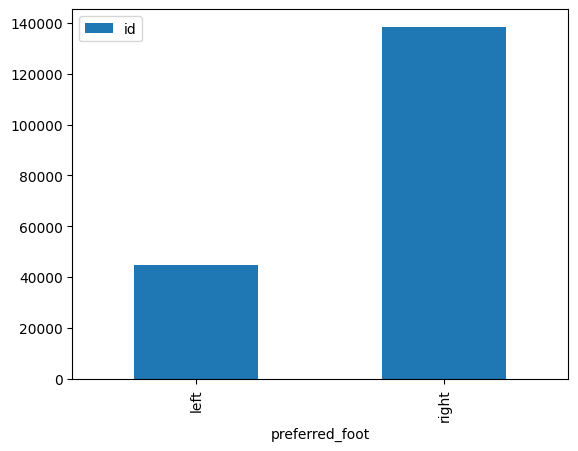

In [20]:
df_p_atr_h.groupby("preferred_foot").agg({"id":"count"}).plot.bar()
plt.show()

Se aprecia que hay aprox tres veces la cantidad de diestros que de zurdos.

In [21]:
df_p_atr.describe()

,id,player_fifa_api_id,date,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183142.000000,183142.000000,183142,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,181265.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91978.031265,165826.723040,2012-12-15 14:57:40.003713280,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,59.175154,52.965675,49.380950,57.069880,63.388879,67.659357,68.051244,65.970910,66.103706,65.189496,61.808427,66.969045,67.038544,67.424529,53.339431,60.948046,52.009271,55.786504,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
min,1.000000,2.000000,2007-02-22 00:00:00,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,3.000000,5.000000,10.000000,12.000000,11.000000,17.000000,12.000000,2.000000,14.000000,10.000000,10.000000,1.000000,6.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45985.250000,155885.000000,2011-02-22 00:00:00,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,52.000000,41.000000,36.000000,49.000000,58.000000,61.000000,62.000000,58.000000,61.000000,58.000000,54.000000,60.000000,61.000000,60.000000,41.000000,51.000000,34.000000,45.000000,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91958.500000,183527.000000,2013-09-20 00:00:00,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,64.000000,56.000000,50.000000,59.000000,67.000000,69.000000,69.000000,68.000000,67.000000,67.000000,65.000000,68.000000,69.000000,69.000000,58.000000,64.000000,57.000000,60.000000,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137972.750000,199912.000000,2015-01-09 00:00:00,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,72.000000,67.000000,63.000000,67.000000,73.000000,77.000000,77.000000,75.000000,72.000000,74.000000,73.000000,74.000000,76.000000,76.000000,67.000000,73.000000,68.000000,69.000000,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.000000,234141.000000,2016-07-07 00:00:00,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,97.000000,94.000000,97.000000,97.000000,97.000000,97.000000,97.000000,96.000000,96.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,97.000000,96.000000,96.000000,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000
std,53116.611471,53782.559432,NaN,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,17.744688,18.255788,17.831746,14.394464,15.196671,12.983326,12.569721,12.954585,9.155408,13.063188,16.135143,11.006734,13.165262,12.072280,18.367025,16.089521,19.450133,18.448292,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155


Generalmente la función "describe" funciona para hallar valores atípicos en los datos. Sin embargo, el poco conocimiento tanto del ámbito del fútbol como de la base de datos nos impide visualizar algún valor relevante.

## Modelado

### Preliminares

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
df_merge.head()

,id_x,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,id_y,player_name,birthday,height,weight
0,1,218353,505942,2016-02-18,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,1,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
1,2,218353,505942,2015-11-19,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,1,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
2,3,218353,505942,2015-09-21,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,1,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
3,4,218353,505942,2015-03-20,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,1,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
4,5,218353,505942,2007-02-22,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,1,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187


### One Hot Encoding

Considerando el interés en las 2 variables: Defensive y Attacking para un análisis de regresión logística, aplicando la siguiente transformación dependiendo de las categorías.
* 1: sí posee la característica
* 0: no posee la característica

In [23]:
df_prod = df_p_atr_h.copy()
df_prod = df_prod.dropna().drop(columns=["date"])
# variable objetivo
df_prod["fkc"] = df_prod["free_kick_accuracy"]>70
df_prod = df_prod.drop(columns=["free_kick_accuracy"])
# encoding
df_prod = pd.concat([df_prod.drop(columns=['attacking_work_rate','defensive_work_rate']),
                     pd.get_dummies(df_prod['attacking_work_rate'], dtype=float, prefix = 'awr'),
                     pd.get_dummies(df_prod['defensive_work_rate'], dtype=float, prefix = 'dwr')],
                    axis=1)
df_prod.head()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,preferred_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,fkc,awr_high,awr_low,awr_medium,dwr_high,dwr_low,dwr_medium
0,1,218353,505942,67.0,71.0,right,49.0,44.0,71.0,61.0,44.0,51.0,45.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,False,0.0,0.0,1.0,0.0,0.0,1.0
1,2,218353,505942,67.0,71.0,right,49.0,44.0,71.0,61.0,44.0,51.0,45.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,False,0.0,0.0,1.0,0.0,0.0,1.0
2,3,218353,505942,62.0,66.0,right,49.0,44.0,71.0,61.0,44.0,51.0,45.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,False,0.0,0.0,1.0,0.0,0.0,1.0
3,4,218353,505942,61.0,65.0,right,48.0,43.0,70.0,60.0,43.0,50.0,44.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,False,0.0,0.0,1.0,0.0,0.0,1.0
4,5,218353,505942,61.0,65.0,right,48.0,43.0,70.0,60.0,43.0,50.0,44.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,False,0.0,0.0,1.0,0.0,0.0,1.0


In [24]:
X = df_prod.drop(columns=["fkc"])
y = df_prod["fkc"]

### Splitting

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=77)

### Scaling

In [26]:
scaler = StandardScaler()
X_train_numeric = X_train.select_dtypes(include=np.number)
X_train_scaled = scaler.fit_transform(X_train_numeric)

X_test_numeric = X_test.select_dtypes(include=np.number)
X_test_scaled = scaler.transform(X_test_numeric)

### Modelos de aprendizaje supervisado

In [27]:
# logistic regression
model_lr = LogisticRegression()
model_lr.fit(X_train_scaled, y_train)
y_hat_lr = model_lr.predict(X_test_scaled)

In [28]:
# random forest
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scaled, y_train)
y_hat_rf = model_rf.predict(X_test_scaled)

### Resultados

In [29]:
# logistic regression
acc_lr = accuracy_score(y_test, y_hat_lr)
print(acc_lr)
cr_lr = classification_report(y_test, y_hat_lr)
print(cr_lr)

0.8740586565752129
              precision    recall  f1-score   support

       False       0.87      1.00      0.93     23096
        True       0.51      0.01      0.01      3329

    accuracy                           0.87     26425
   macro avg       0.69      0.50      0.47     26425
weighted avg       0.83      0.87      0.82     26425



In [30]:
# random forest
acc_rf = accuracy_score(y_test, y_hat_rf)
print(acc_rf)
cr_rf = classification_report(y_test, y_hat_rf)
print(cr_rf)

0.9833869441816462
              precision    recall  f1-score   support

       False       0.99      0.99      0.99     23096
        True       0.94      0.93      0.93      3329

    accuracy                           0.98     26425
   macro avg       0.96      0.96      0.96     26425
weighted avg       0.98      0.98      0.98     26425



### Modelos de aprendizaje no supervisado

In [44]:
X_numeric = X.select_dtypes(include = np.number)
model_pca = PCA(2)
X_pca = model_pca.fit_transform(X_numeric)
model_km = KMeans(n_clusters=2, random_state=0, n_init="auto").fit_transform(X_pca)